1. Practicing random data csv file creation

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

rows = 500

data = {
    "order_id": range(1001, 1001 + rows),
    "order_date": pd.date_range(start="2024-01-01", periods=rows, freq="D"),
    "customer_age": np.random.randint(18, 65, rows),
    "customer_gender": np.random.choice(["M", "F"], rows),
    "country": np.random.choice(
        ["USA", "Canada", "UK", "Germany", "France"], rows
    ),
    "product_category": np.random.choice(
        ["Electronics", "Clothing", "Home", "Beauty"], rows
    ),
    "unit_price": np.round(np.random.uniform(15, 600, rows), 2),
    "quantity": np.random.randint(1, 6, rows),
    "payment_method": np.random.choice(
        ["Card", "PayPal", "Crypto"], rows
    ),
}

df = pd.DataFrame(data)
df["order_total"] = np.round(df["unit_price"] * df["quantity"], 2)

df.to_csv("ecommerce_sales_500.csv", index=False)

df.head()

,order_id,order_date,customer_age,customer_gender,country,product_category,unit_price,quantity,payment_method,order_total
0,1001,2024-01-01,56,M,USA,Electronics,295.76,3,Card,887.28
1,1002,2024-01-02,46,M,UK,Clothing,366.01,1,PayPal,366.01
2,1003,2024-01-03,32,M,France,Clothing,185.62,5,PayPal,928.10
3,1004,2024-01-04,60,M,USA,Home,421.56,4,Crypto,1686.24
4,1005,2024-01-05,25,M,Canada,Clothing,518.17,5,Crypto,2590.85


2. Checking the data to be trustworthy

In [ ]:
df.info()
df.isna().sum()

(df["unit_price"] * df["quantity"] == df["order_total"]).all()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          500 non-null    int64         
 1   order_date        500 non-null    datetime64[us]
 2   customer_age      500 non-null    int32         
 3   customer_gender   500 non-null    str           
 4   country           500 non-null    str           
 5   product_category  500 non-null    str           
 6   unit_price        500 non-null    float64       
 7   quantity          500 non-null    int32         
 8   payment_method    500 non-null    str           
 9   order_total       500 non-null    float64       
dtypes: datetime64[us](1), float64(2), int32(2), int64(1), str(4)
memory usage: 35.3 KB


np.False_

3. number of orders / order price

<Axes: >

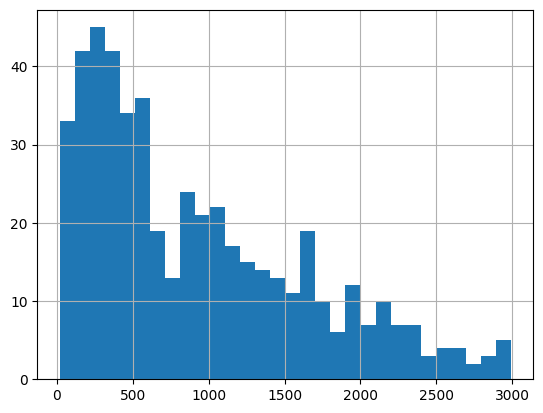

In [ ]:
df.describe()

df["order_total"].hist(bins=30)

4. Grouping by category

In [ ]:
df.groupby("product_category")["order_total"].agg(
    ["count", "mean", "sum"]
)

,count,mean,sum
product_category,,,
Beauty,122,957.192295,116777.46
Clothing,122,896.161721,109331.73
Electronics,132,929.818258,122736.01
Home,124,913.991048,113334.89


5. Grouping by country

In [7]:
df.groupby("country")["order_total"].agg(
    ["count", "mean", "sum"]
)

,count,mean,sum
country,,,
Canada,99,920.650707,91144.42
France,97,812.373402,78800.22
Germany,89,998.869213,88899.36
UK,106,954.337453,101159.77
USA,109,937.397431,102176.32


6. Orders amount / date statistic 

<Axes: xlabel='order_date'>

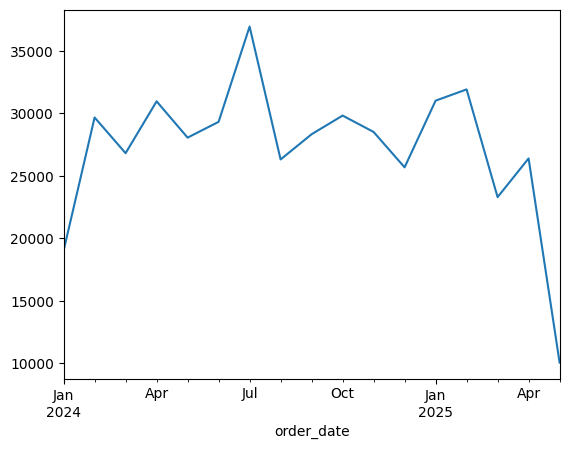

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])

df.set_index("order_date")["order_total"].resample("ME").sum().plot()

7. plotting

<Axes: xlabel='unit_price', ylabel='order_total'>

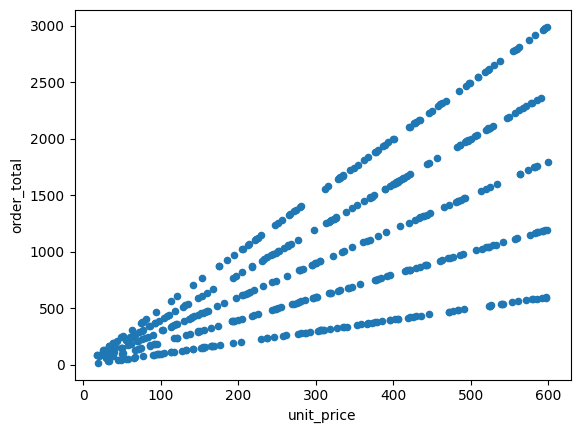

In [ ]:
df.plot.scatter(x="unit_price", y="order_total")

8. group it, baby

<Axes: xlabel='product_category'>

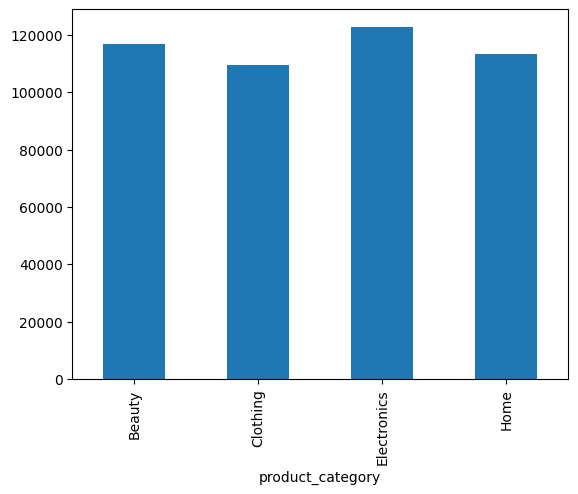

In [ ]:
df.groupby("product_category")["order_total"].sum().plot(kind="bar")

9. Something very smart

<Axes: title={'center': 'order_total'}, xlabel='product_category'>

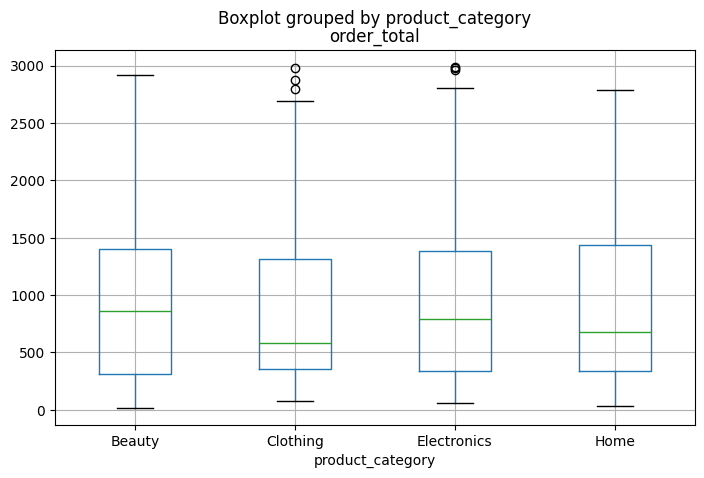

In [13]:
df.boxplot(column="order_total", by="product_category", figsize=(8,5))

10. bar chart stacked

<Axes: xlabel='country'>

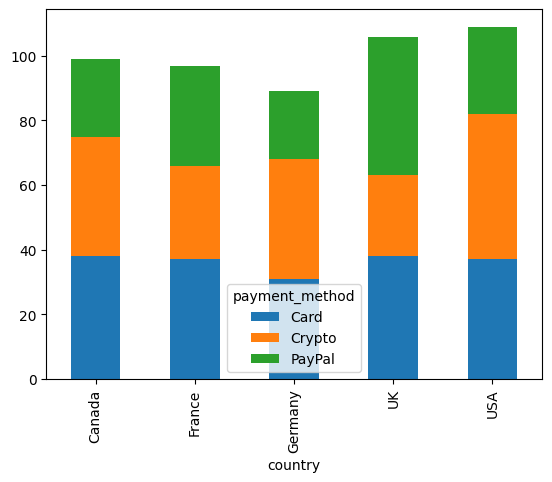

In [14]:
pd.crosstab(df["country"], df["payment_method"]).plot(kind="bar", stacked=True)

11. Bring the HEAT!

<Axes: xlabel='product_category', ylabel='country'>

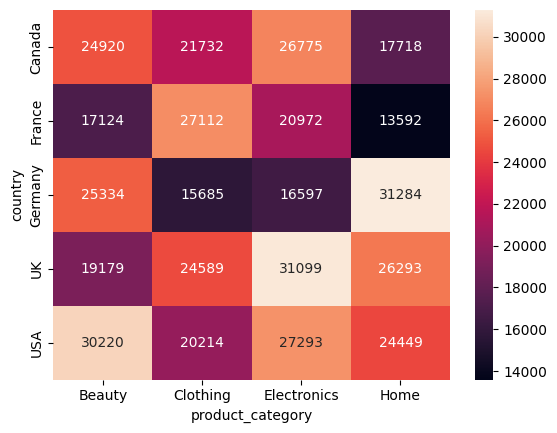

In [16]:
import seaborn as sns

pivot = df.pivot_table(
    values="order_total",
    index="country",
    columns="product_category",
    aggfunc="sum"
)

sns.heatmap(pivot, annot=True, fmt=".0f")

12. Let's add columns and create age labels

In [18]:
df["high_value_order"] = df["order_total"] > 300
df["age_group"] = pd.cut(
    df["customer_age"],
    bins=[18, 30, 45, 65],
    labels=["Young", "Mid", "Senior"]
)

In [ ]:
df[["order_total", "high_value_order", "customer_age", "age_group"]].head()

,order_total,high_value_order,customer_age,age_group
0,887.28,True,56,Senior
1,366.01,True,46,Senior
2,928.10,True,32,Mid
3,1686.24,True,60,Senior
4,2590.85,True,25,Young


13. saving new csv file

In [21]:
df.to_csv("ecommerce_sales_500_enriched.csv", index=False)